In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings

warnings.filterwarnings("ignore","FutureWarning")



In [ ]:
from IPython.display import display, HTML


content = """
<div style="background-color: #90e0ef; padding: 20px; border-radius: 10px;">
    <h1>Data Acquisition</h1>
</div>
"""

# Display the HTML content
display(HTML(content))

In [ ]:
from google.colab import files
import pandas as pd

files.upload()
df = pd.read_csv('Delhi_House_Price_Data.csv')

Saving Delhi_House_Price_Data.csv to Delhi_House_Price_Data.csv


In [ ]:
from IPython.display import display, HTML


content = """
<div style="background-color: #90e0ef; padding: 20px; border-radius: 10px;">
    <h1>Data Understanding</h1>
</div>
"""

# Display the HTML content
display(HTML(content))

In [ ]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [ ]:
df.columns.tolist()

['Area',
 'BHK',
 'Bathroom',
 'Furnishing',
 'Locality',
 'Parking',
 'Price',
 'Status',
 'Transaction',
 'Type',
 'Per_Sqft']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [ ]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [ ]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [ ]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
numerical_columns.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      1259 non-null   float64
 1   BHK       1259 non-null   int64  
 2   Bathroom  1257 non-null   float64
 3   Parking   1226 non-null   float64
 4   Price     1259 non-null   int64  
 5   Per_Sqft  1018 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 59.1 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [ ]:
categorical_columns = df.select_dtypes(include=['object'])
print(list(categorical_columns.columns))

['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']


In [ ]:
from IPython.display import display, HTML


content = """
<div style="background-color: #90e0ef; padding: 20px; border-radius: 10px;">
    <h1>Data Visualization</h1>
</div>
"""

# Display the HTML content
display(HTML(content))

In [ ]:
sns.set(style='whitegrid')

<ipython-input-53-f666de8f84e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df['Price'], palette='cool')


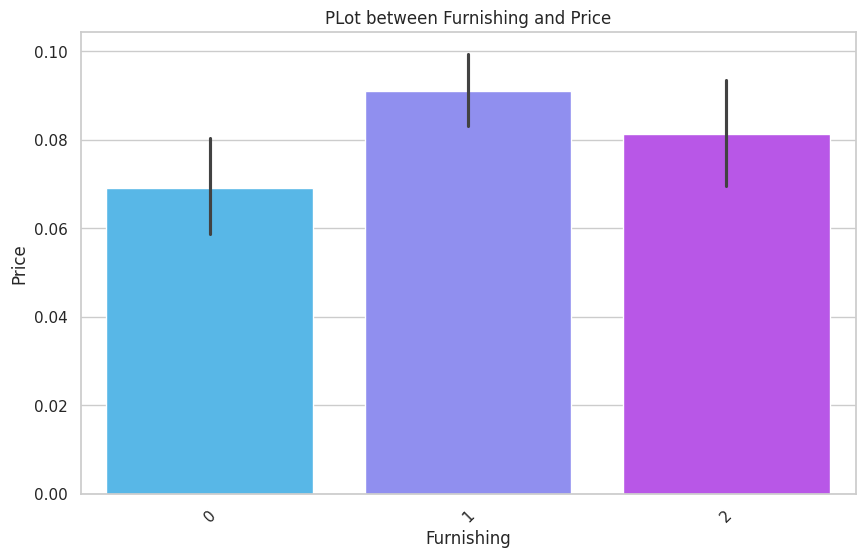

<ipython-input-53-f666de8f84e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df['Price'], palette='cool')


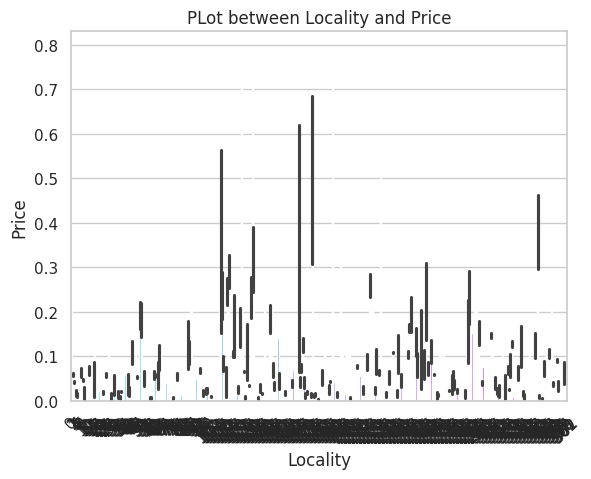

<ipython-input-53-f666de8f84e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df['Price'], palette='cool')


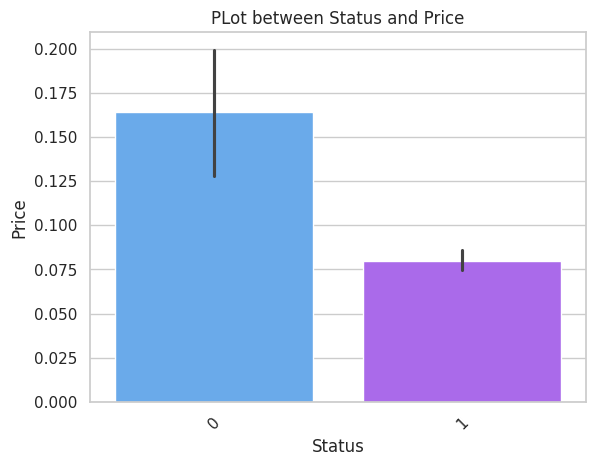

<ipython-input-53-f666de8f84e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df['Price'], palette='cool')


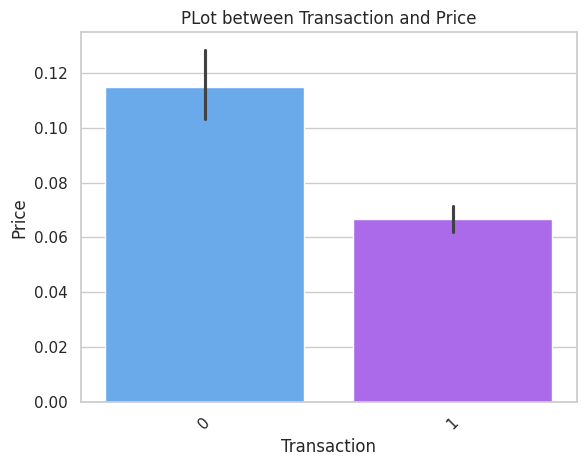

<ipython-input-53-f666de8f84e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df['Price'], palette='cool')


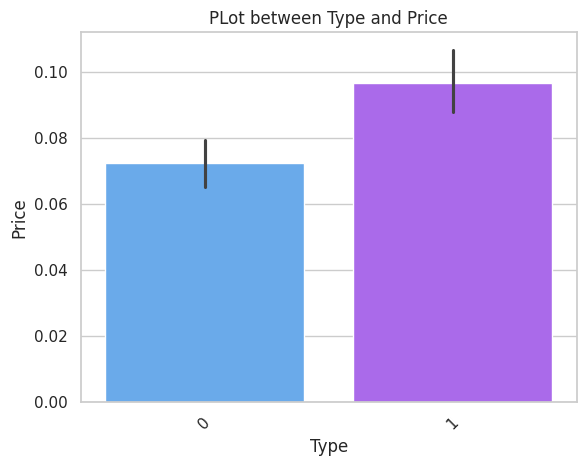

In [ ]:

plt.figure(figsize=(10, 6))
for col in categorical_columns.columns:
    sns.barplot(x=df[col], y=df['Price'], palette='cool')
    plt.title(f"PLot between {col} and Price")
    plt.xlabel(f"{col}")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.show()

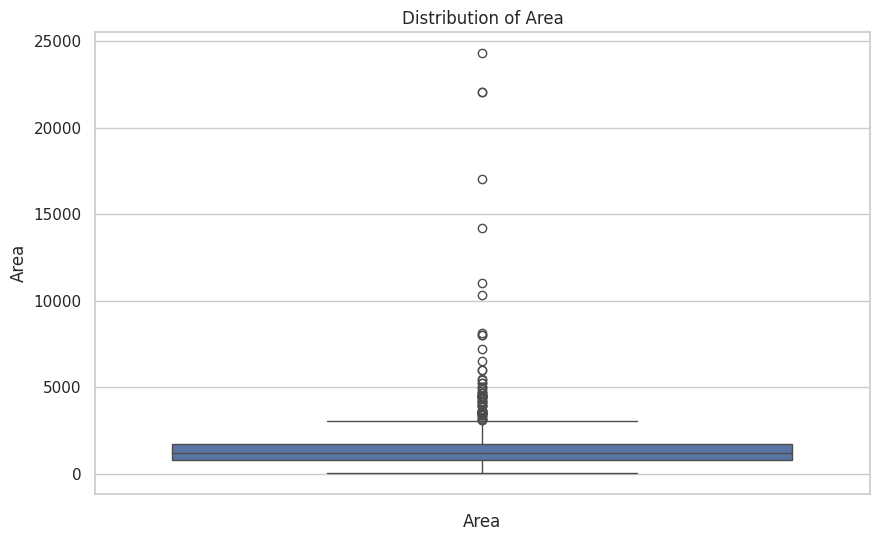

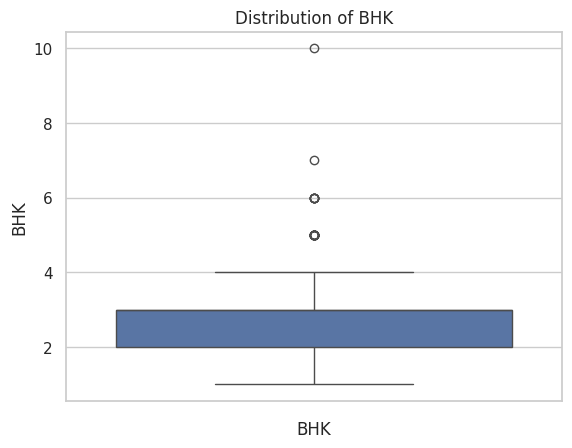

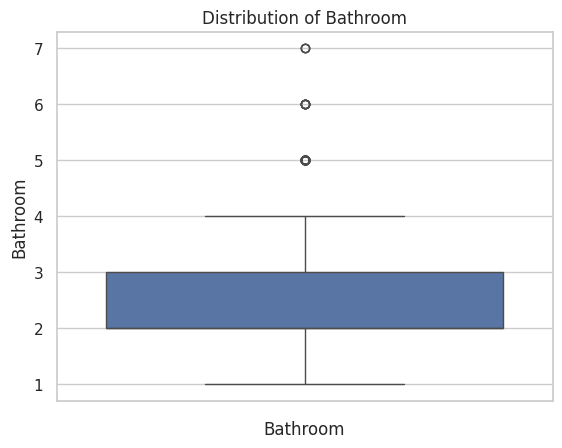

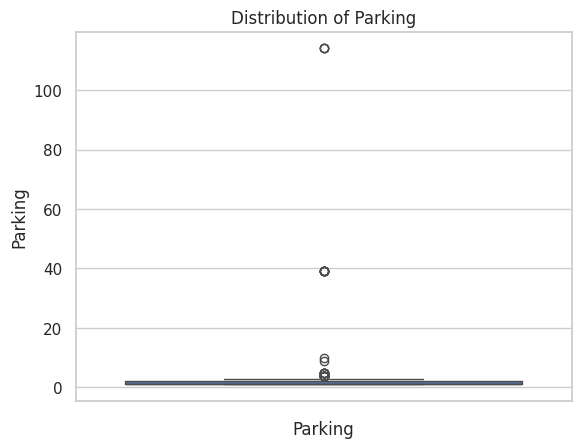

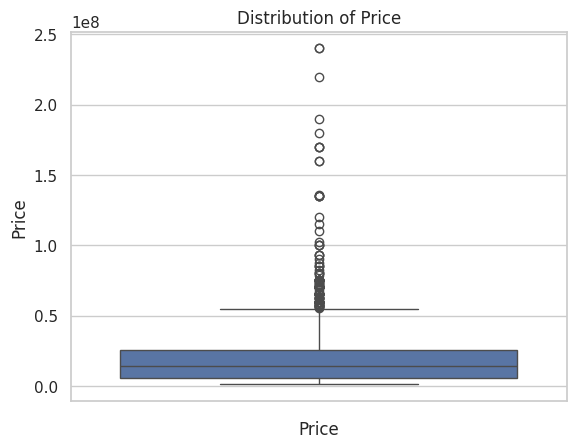

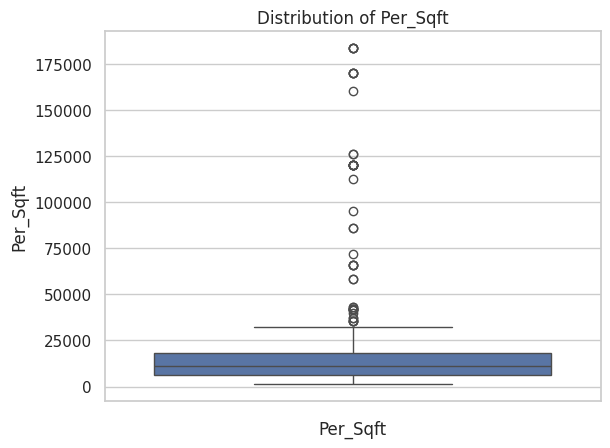

In [ ]:
plt.figure(figsize=(10, 6))
for col in numerical_columns.columns:
    sns.boxplot(df[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
from IPython.display import display, HTML


content = """
<div style="background-color: #90e0ef; padding: 20px; border-radius: 10px;">
    <h1>Preprocessing</h1>
</div>
"""

# Display the HTML content
display(HTML(content))

In [ ]:
def handle_missing_values(df):

    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        missing_rows = df[col].isna().sum()

        if missing_rows < 50:
            df.dropna(subset = [col], inplace=True)

    return df

In [ ]:
handle_missing_values(df)
df.isna().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

def preprocess_data(df):
    # Detect numerical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Min-max scale numerical columns
    scaler = MinMaxScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    # Detect categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Label encode categorical columns
    label_encoder = LabelEncoder()
    for col in categorical_cols:
        if col in df.columns:  # Check if column still exists in DataFrame (might have been dropped)
            df[col] = label_encoder.fit_transform(df[col])

    return df

preprocess_data(df)


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,0.031806,0.222222,0.166667,1,282,0.000000,0.023013,1,0,1,0.055101
1,0.029746,0.111111,0.166667,1,138,0.000000,0.016736,1,0,0,0.029702
2,0.037986,0.111111,0.166667,0,49,0.000000,0.060669,1,1,0,0.029702
3,0.023566,0.111111,0.166667,1,280,0.000000,0.013389,1,1,1,0.029702
4,0.025626,0.111111,0.166667,1,281,0.000000,0.021757,1,0,1,0.029702
...,...,...,...,...,...,...,...,...,...,...,...
1254,0.168507,0.333333,0.666667,2,44,0.017699,0.225941,1,0,1,0.064023
1255,0.042106,0.222222,0.166667,1,44,0.017699,0.048117,1,1,1,0.064023
1256,0.034896,0.222222,0.333333,1,44,0.017699,0.069038,1,0,1,0.064023
1257,0.039634,0.111111,0.166667,2,45,0.000000,0.043933,1,1,1,0.064023


In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
from IPython.display import display, HTML


content = """
<div style="background-color: #90e0ef; padding: 20px; border-radius: 10px;">
    <h1>Model building</h1>
</div>
"""

# Display the HTML content
display(HTML(content))

In [ ]:
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    ElasticNet,
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "Support Vector Regression (SVR)": SVR(),
    "K-Nearest Neighbors Regression (KNN)": KNeighborsRegressor(),
    "XGBoost Regression": xgb.XGBRegressor()
}

best_model = None
best_r2 = -float('inf')

for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}, R-squared (R2): {r2:.3f}")
    print()
    print("="*75)

    if r2 > best_r2:
        best_model = model
        best_r2 = r2




print(f"{best_model.__class__.__name__} with r2_score: {best_r2:3f}")



Model: Linear Regression, R-squared (R2): 0.552

Model: Lasso Regression, R-squared (R2): -0.011

Model: Ridge Regression, R-squared (R2): 0.557

Model: ElasticNet Regression, R-squared (R2): -0.011

Model: Decision Tree Regression, R-squared (R2): 0.742

Model: Random Forest Regression, R-squared (R2): 0.798

Model: Gradient Boosting Regression, R-squared (R2): 0.834

Model: Support Vector Regression (SVR), R-squared (R2): -0.001

Model: K-Nearest Neighbors Regression (KNN), R-squared (R2): 0.513

Model: XGBoost Regression, R-squared (R2): 0.833

GradientBoostingRegressor with r2_score: 0.834086


In [ ]:
print(f"{best_model.__class__.__name__} with r2_score: {best_r2:3f}")


GradientBoostingRegressor with r2_score: 0.834086


In [ ]:
from IPython.display import display, HTML


content = """
<div style="background-color: #90e0ef; padding: 20px; border-radius: 10px;">
    <h1>HyperParameter Tuning</h1>
</div>
"""

# Display the HTML content
display(HTML(content))

In [ ]:
# Print parameters of the best model
print("=" * 50)
print("Best Model Parameters:")
for param_name, param_value in best_model.get_params().items():
    print(f"{param_name}: {param_value}")


Best Model Parameters:
alpha: 0.9
ccp_alpha: 0.0
criterion: friedman_mse
init: None
learning_rate: 0.1
loss: squared_error
max_depth: 3
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_iter_no_change: None
random_state: None
subsample: 1.0
tol: 0.0001
validation_fraction: 0.1
verbose: 0
warm_start: False


# Selection of params

* n_estimators
* learning_rate
* max_depth
* min_child_weight
* gamma

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb



param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1,1.0],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}


xgb_model = xgb.XGBRegressor()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2')
tuner = grid_search.fit(X_train, y_train)

# Get the best parameters and best R2 score
best_params = tuner.best_params_
best_score = tuner.best_score_

print("Best Parameters:", best_params)
print("Best R2 Score:", best_score)

Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200}
Best R2 Score: 0.8387373223561934


In [ ]:
from IPython.display import display, HTML


content = """
<div style="background-color: #90e0ef; padding: 20px; border-radius: 10px;">
    <h1>Feautre Importance Plot</h1>
</div>
"""

# Display the HTML content
display(HTML(content))

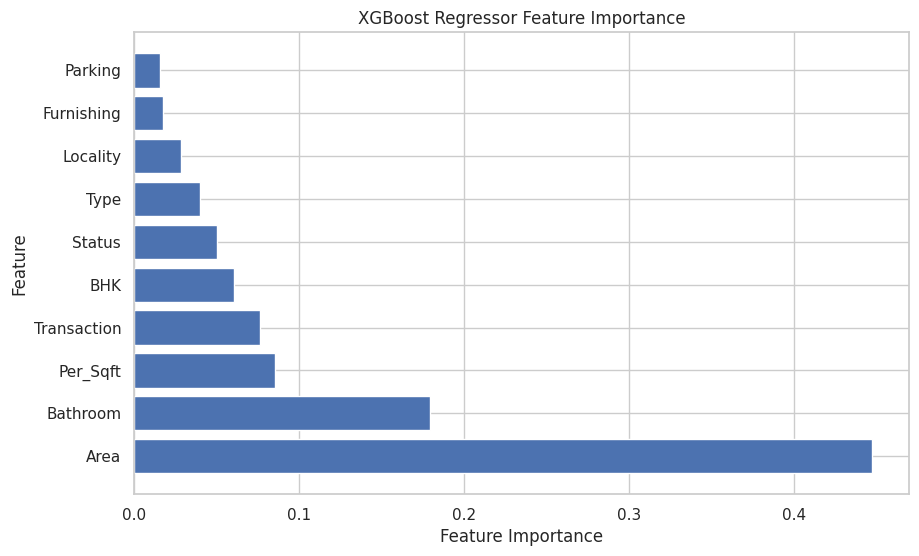

In [ ]:
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Train the XGBoost regressor
xgb_model.fit(X_train, y_train)

importance = xgb_model.feature_importances_


feature_names =  ['Area','BHK','Bathroom','Furnishing','Locality','Parking','Status','Transaction','Type','Per_Sqft']
feature_importance_dict = dict(zip(feature_names, importance))

# Sort feature importance in descending order
sorted_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance)), [val[1] for val in sorted_importance], align='center')
plt.yticks(range(len(sorted_importance)), [val[0] for val in sorted_importance])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Regressor Feature Importance')
plt.show()

## Best R2_score is : 0.838 or 83.8 %